# Classification: Wisconsin Breast Cancer
- Dataset from UCI repository
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

### Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [2]:
import pandas as pd

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [
    'Code', 'Clump-Thickness', 'Cell-Size', 'Cell-Shape', 'Adhesion', 
    'Single-Cell-Size', 'Bare-Nuclei', 'Chromatin', 'Nucleoli', 'Mitoses', 'Class']
dataset = pd.read_csv(url, names=names)

### 지금까지 배운 모델을 사용해 유방암 여부를 예측하는 좋은 성능의 모델을 만들어보세요.

In [5]:
#Logi Reg / kNN / NB / DT
dataset.head(5)

,Code,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,Bare-Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


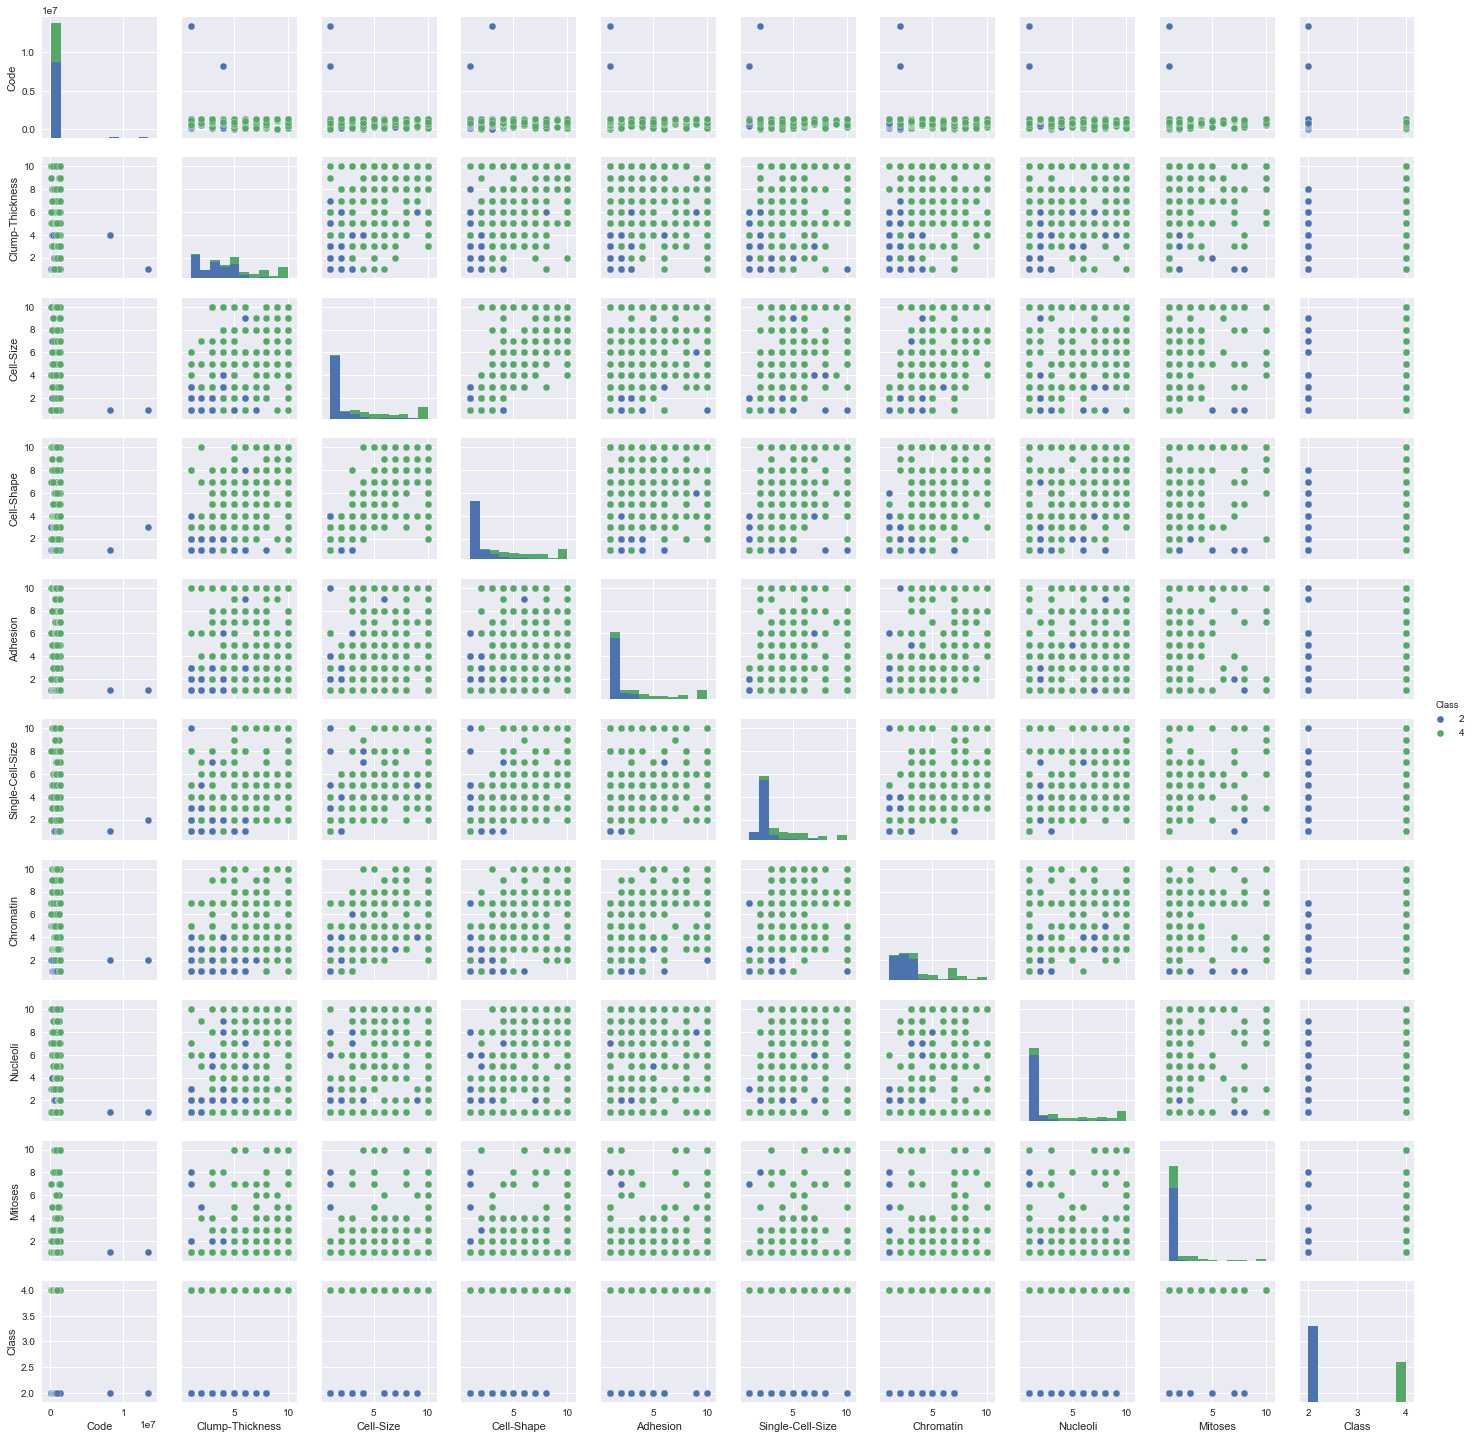

In [9]:
#그림을 그려서 확인해봅니다
%matplotlib inline
import seaborn as sns
sns.pairplot(dataset, hue="Class", size = 2)

In [15]:
#그림을 봐도 잘 모르겠으니 하나씩 해봅니다
list(dataset.columns.values)

['Code',
 'Clump-Thickness',
 'Cell-Size',
 'Cell-Shape',
 'Adhesion',
 'Single-Cell-Size',
 'Bare-Nuclei',
 'Chromatin',
 'Nucleoli',
 'Mitoses',
 'Class']

In [24]:
dataset.dtypes

Code                 int64
Clump-Thickness      int64
Cell-Size            int64
Cell-Shape           int64
Adhesion             int64
Single-Cell-Size     int64
Bare-Nuclei         object
Chromatin            int64
Nucleoli             int64
Mitoses              int64
Class                int64
dtype: object

In [44]:
#Bare-Nuclei object를 숫자로....
dataset['Bare-Nuclei'].value_counts().sort_index()
dataset['ReplacedBN'] = dataset['Bare-Nuclei']
dataset.loc[dataset['Bare-Nuclei']=='?','ReplacedBN'] = 5 #1~10 쯤 되니까 대충 중간값
dataset['ReplacedBN'] = dataset['ReplacedBN'].convert_objects(convert_numeric=True)
dataset['ReplacedBN'].value_counts().sort_index()

/Users/minhong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


1     402
2      30
3      28
4      19
5      46
6       4
7       8
8      21
9       9
10    132
Name: ReplacedBN, dtype: int64

In [45]:
dataset.corr().Class

Code               -0.080226
Clump-Thickness     0.716001
Cell-Size           0.817904
Cell-Shape          0.818934
Adhesion            0.696800
Single-Cell-Size    0.682785
Chromatin           0.756616
Nucleoli            0.712244
Mitoses             0.423170
Class               1.000000
ReplacedBN          0.810290
Name: Class, dtype: float64

In [46]:
#대충 골라서
selected = ['Clump-Thickness',
 'Cell-Size',
 'Cell-Shape',
 'Adhesion',
 'Single-Cell-Size',
 'ReplacedBN',
 'Chromatin',
 'Nucleoli']
X = dataset[selected]
y = dataset.Class
X.head(5)

,Clump-Thickness,Cell-Size,Cell-Shape,Adhesion,Single-Cell-Size,ReplacedBN,Chromatin,Nucleoli
0,5,1,1,1,2,1,3,1
1,5,4,4,5,7,10,3,2
2,3,1,1,1,2,2,3,1
3,6,8,8,1,3,4,3,7
4,4,1,1,3,2,1,3,1


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

print(rescaledX)

[[ 0.44444444  0.          0.         ...,  0.          0.22222222  0.        ]
 [ 0.44444444  0.33333333  0.33333333 ...,  1.          0.22222222
   0.11111111]
 [ 0.22222222  0.          0.         ...,  0.11111111  0.22222222  0.        ]
 ..., 
 [ 0.44444444  1.          1.         ...,  0.22222222  0.77777778  1.        ]
 [ 0.33333333  0.77777778  0.55555556 ...,  0.33333333  1.          0.55555556]
 [ 0.33333333  0.77777778  0.77777778 ...,  0.44444444  1.          0.33333333]]


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    rescaledX, y, test_size=0.3, random_state=0)

In [58]:
#LogisticRegression = 0.947619047619
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

0.947619047619
[[129   6]
 [  5  70]]


In [62]:
# k-NN classifier 이웃3 = 0.966666666667, 이웃5 = 0.957142857143
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #2종이니 이웃 3,5,7,9..명
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
win_pred = metrics.accuracy_score(y_test, y_pred)
win_cm = cm

0.966666666667
[[130   5]
 [  2  73]]


In [57]:
# Gaussian naive Bayes = 0.947619047619
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_2 = gnb.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred_2)
cm = metrics.confusion_matrix(y_test, y_pred_2)
print(accuracy)
print(cm)

0.947619047619
[[127   8]
 [  3  72]]


In [59]:
# DecisionTreeClassifier = 0,1열이 중요(Clump-Thickness, Cell-Size)
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

# create a Graphviz file
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image 
dot_data = StringIO()
export_graphviz(treeclf, out_file= dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("cancer_tree.pdf")
graph.write_png("cancer_tree.png")

True

In [63]:
#결론 => k-NN classifier 이웃3 짱짱맨
print(win_pred)
print(win_cm)

0.966666666667
[[130   5]
 [  2  73]]
